# Virtual Competition 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("/content/train.csv")
train.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [3]:
test = pd.read_csv("/content/test.csv")
test.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban


In [4]:
print(train.shape)
print(test.shape)

(614, 13)
(367, 12)


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [7]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [9]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

## Checking the outliers

<Axes: >

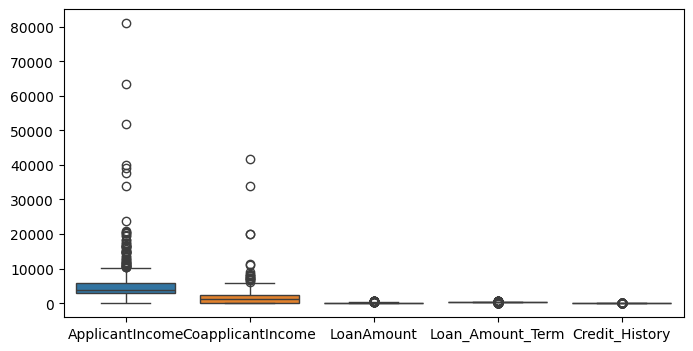

In [11]:
plt.figure(figsize=(8,4))
sns.boxplot(data = train)

<Axes: >

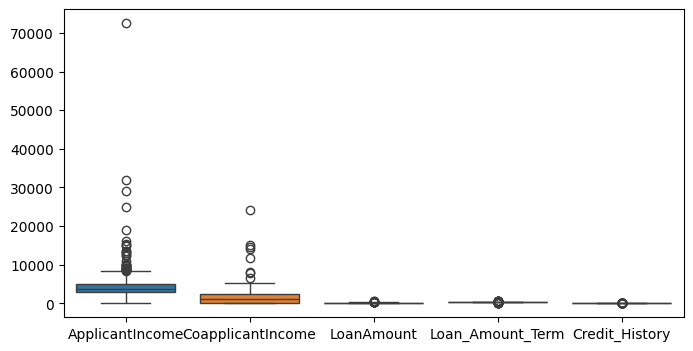

In [12]:
plt.figure(figsize=(8,4))
sns.boxplot(data = test)

### Missing values
#### Fill the null values of numerical datatype

In [13]:
train['LoanAmount'] = train['LoanAmount'].fillna(train['LoanAmount'].median())
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mean())
train['Credit_History'] = train['Credit_History'].fillna(train['Credit_History'].mean())

In [14]:
test['LoanAmount'] = test['LoanAmount'].fillna(test['LoanAmount'].median())
test['Loan_Amount_Term'] = test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mean())
test['Credit_History'] = test['Credit_History'].fillna(test['Credit_History'].mean())

#### Fill the null values of object datatype

In [15]:
train['Gender'] = train['Gender'].fillna(train['Gender'].mode()[0])
train['Married'] = train['Married'].fillna(train['Married'].mode()[0])
train['Dependents'] = train['Dependents'].fillna(train['Dependents'].mode()[0])
train['Self_Employed'] = train['Self_Employed'].fillna(train['Self_Employed'].mode()[0])

In [16]:
test['Gender'] = test['Gender'].fillna(test['Gender'].mode()[0])
test['Married'] = test['Married'].fillna(test['Married'].mode()[0])
test['Dependents'] = test['Dependents'].fillna(test['Dependents'].mode()[0])
test['Self_Employed'] = test['Self_Employed'].fillna(test['Self_Employed'].mode()[0])

In [17]:
train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# 1.Exploratory data analysis

In [18]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

### Gender

Count of loan applicants by gender
Male      502
Female    112
Name: Gender, dtype: int64


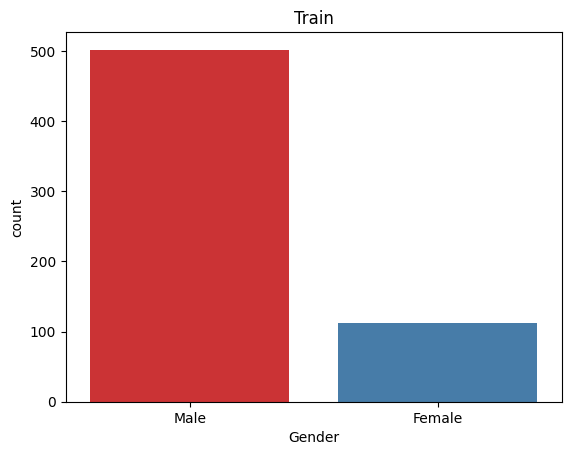

In [19]:
print('Count of loan applicants by gender')
print(train['Gender'].value_counts())
sns.countplot(x='Gender',data = train, palette='Set1').set(title="Train")
plt.show()

Number of people who took loan by gender
Male      297
Female     70
Name: Gender, dtype: int64


[Text(0.5, 1.0, 'Test')]

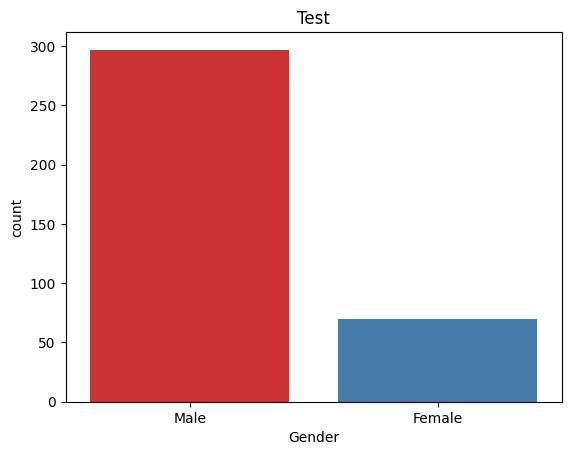

In [20]:
print('Number of people who took loan by gender')
print(test['Gender'].value_counts())
sns.countplot(x='Gender',data = test, palette='Set1').set(title="Test")

### Married

Number of people who took loan by gender
Yes    401
No     213
Name: Married, dtype: int64


[Text(0.5, 1.0, 'Train')]

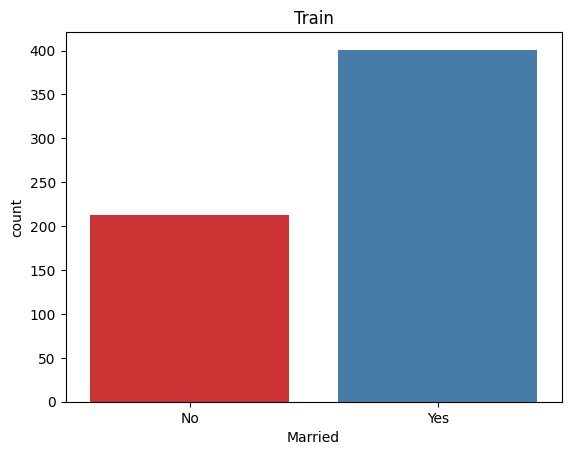

In [21]:
print('Number of people who took loan by gender')
print(train['Married'].value_counts())
sns.countplot(x='Married',data = train, palette='Set1').set(title="Train")

Number of people who took loan by gender
Yes    233
No     134
Name: Married, dtype: int64


[Text(0.5, 1.0, 'Test')]

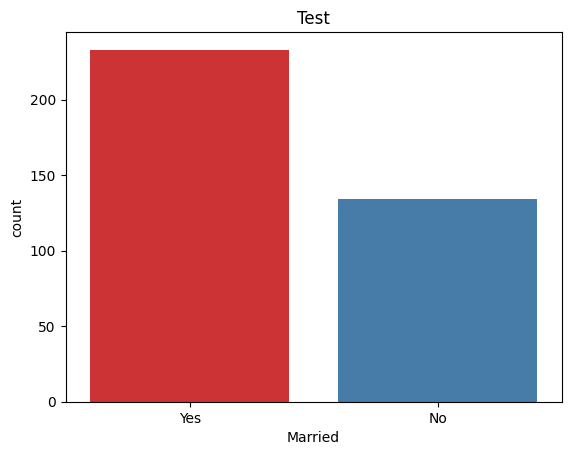

In [22]:
print('Number of people who took loan by gender')
print(test['Married'].value_counts())
sns.countplot(x='Married',data = test, palette='Set1').set(title="Test")

### Education

Number of people who took loan by gender
Graduate        480
Not Graduate    134
Name: Education, dtype: int64


[Text(0.5, 1.0, 'Train')]

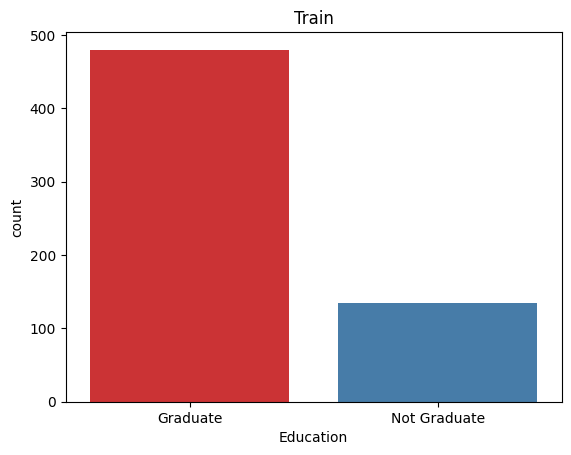

In [23]:
print('Number of people who took loan by gender')
print(train['Education'].value_counts())
sns.countplot(x='Education',data = train, palette='Set1').set(title="Train")

Number of people who took loan by gender
Graduate        283
Not Graduate     84
Name: Education, dtype: int64


[Text(0.5, 1.0, 'Test')]

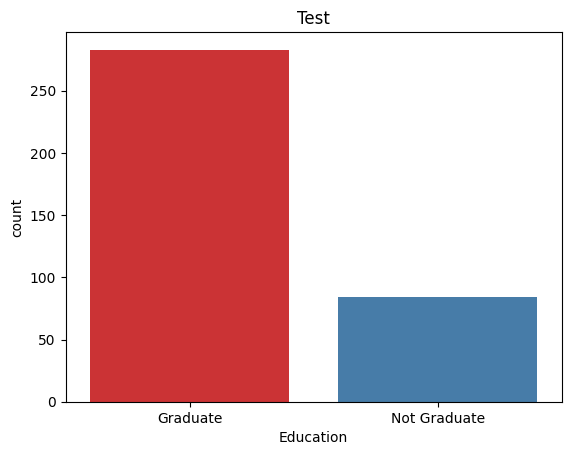

In [24]:
print('Number of people who took loan by gender')
print(test['Education'].value_counts())
sns.countplot(x='Education',data = test, palette='Set1').set(title="Test")

In [25]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<Axes: >

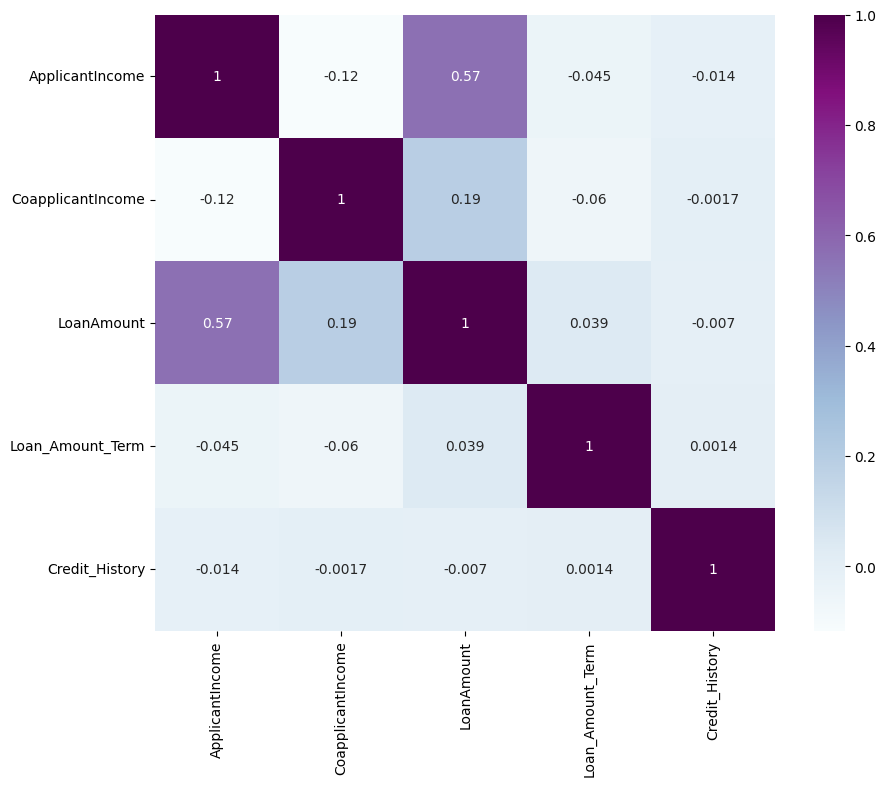

In [26]:
corr = train[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History']].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot = True, cmap = 'BuPu')

# 2. Data Pre-Processing

## 2.1 Feature Construction

In [27]:
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
train.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0


In [28]:
test['Total_Income'] = test['ApplicantIncome'] + test['CoapplicantIncome']
test.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,5720
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4576


### Apply Log Transformation-train

<Axes: xlabel='ApplicantIncomelog', ylabel='Density'>

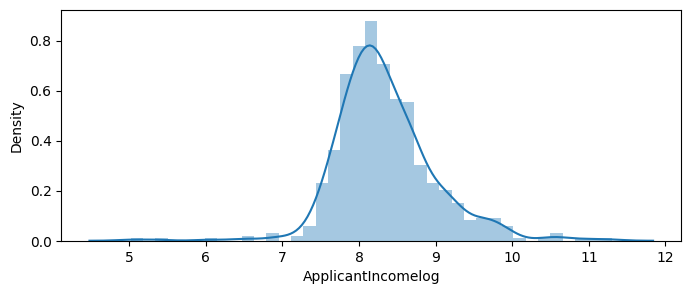

In [29]:
train['ApplicantIncomelog'] = np.log(train['ApplicantIncome'] + 1)
plt.figure(figsize=(8,3))
sns.distplot(train['ApplicantIncomelog'])

<Axes: xlabel='LoanAmountlog', ylabel='Density'>

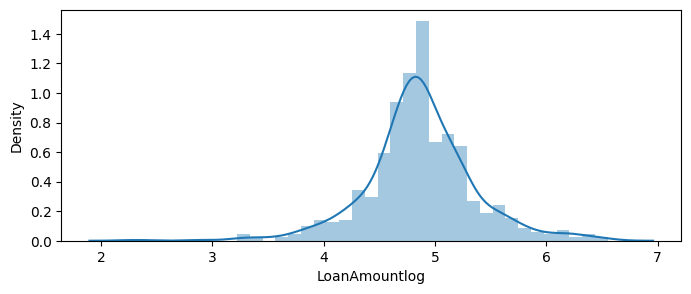

In [30]:
train['LoanAmountlog'] = np.log(train['LoanAmount'] + 1)
plt.figure(figsize=(8,3))
sns.distplot(train['LoanAmountlog'])

<Axes: xlabel='Loan_Amount_Term_log', ylabel='Density'>

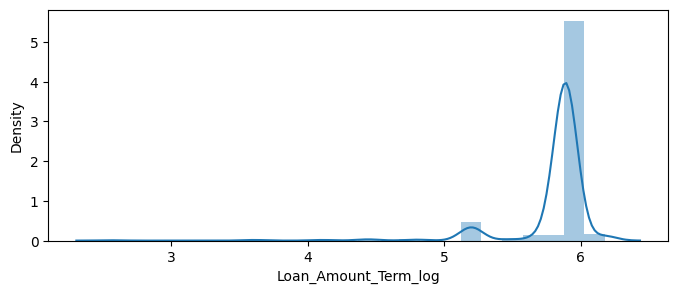

In [31]:
train['Loan_Amount_Term_log'] = np.log(train['Loan_Amount_Term'] + 1)
plt.figure(figsize=(8,3))
sns.distplot(train['Loan_Amount_Term_log'])

### Apply Log Transformation-Test

<Axes: xlabel='ApplicantIncomelog', ylabel='Density'>

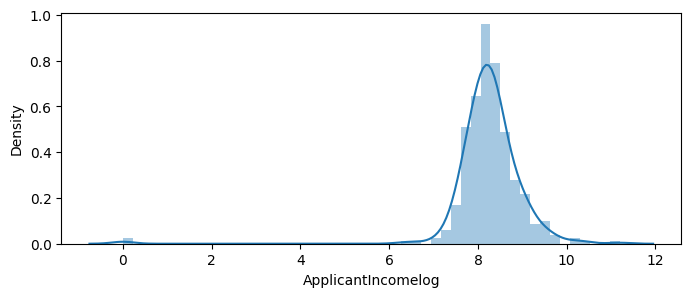

In [32]:
test['ApplicantIncomelog'] = np.log(test['ApplicantIncome'] + 1)
plt.figure(figsize=(8,3))
sns.distplot(test['ApplicantIncomelog'])

<Axes: xlabel='LoanAmountlog', ylabel='Density'>

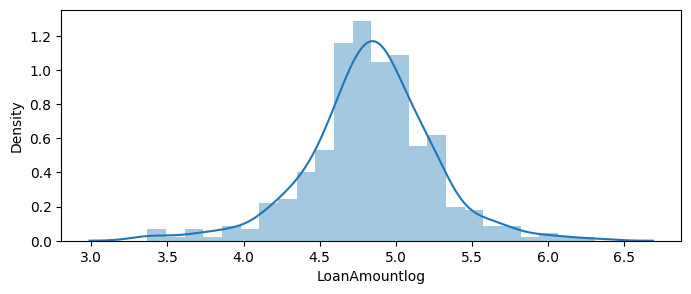

In [33]:
test['LoanAmountlog'] = np.log(test['LoanAmount'] + 1)
plt.figure(figsize=(8,3))
sns.distplot(test['LoanAmountlog'])

<Axes: xlabel='Loan_Amount_Term_log', ylabel='Density'>

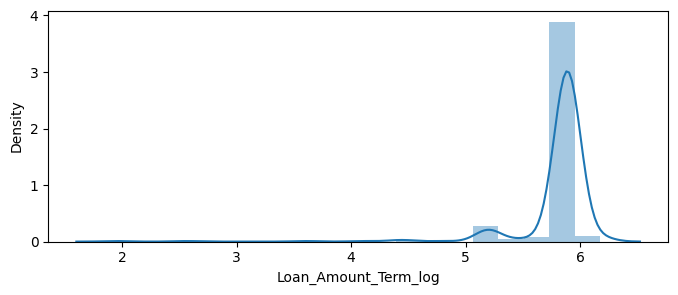

In [34]:
test['Loan_Amount_Term_log'] = np.log(test['Loan_Amount_Term'] + 1)
plt.figure(figsize=(8,3))
sns.distplot(test['Loan_Amount_Term_log'])

## 2.2 Feature Reduction

### drop unnecessary columns

In [35]:
cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Total_Income','Loan_ID']
train1 = train.drop(columns = cols, axis = 1)
train1.head(3)

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomelog,LoanAmountlog,Loan_Amount_Term_log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674197,4.859812,5.888878
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430327,4.859812,5.888878
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006701,4.204693,5.888878


In [36]:
cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Total_Income','Loan_ID']
test1 = test.drop(columns = cols, axis = 1)
test1.head(3)

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncomelog,LoanAmountlog,Loan_Amount_Term_log
0,Male,Yes,0,Graduate,No,1.0,Urban,8.651899,4.709530,5.888878
1,Male,Yes,1,Graduate,No,1.0,Urban,8.031710,4.844187,5.888878
2,Male,Yes,2,Graduate,No,1.0,Urban,8.517393,5.342334,5.888878


## 2.3 Feature scaling

In [37]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender','Married','Education','Dependents','Self_Employed','Property_Area']
le =  LabelEncoder()
for col in cols:
    train1[col] =  le.fit_transform(train1[col])
    test1[col] =  le.transform(test1[col])

train1['Loan_Status'] =  le.fit_transform(train1['Loan_Status'])

In [38]:
train1.head(3)

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomelog,LoanAmountlog,Loan_Amount_Term_log
0,1,0,0,0,0,1.0,2,1,8.674197,4.859812,5.888878
1,1,1,1,0,0,1.0,0,0,8.430327,4.859812,5.888878
2,1,1,0,0,1,1.0,2,1,8.006701,4.204693,5.888878


# 3. Modelling

In [39]:
from sklearn.model_selection import train_test_split

X = train1.drop(columns = ['Loan_Status'],axis = 1)
y = train1['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25,random_state = 52)

print(X_train.shape)
print(y_train.shape)

(460, 10)
(460,)


* Even though the test dataset is given separately the dependent feature is not given in the dataset to calculate the accuracy and other metrics of the dataset

In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score,recall_score,f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [41]:
logr = LogisticRegression()

dtc = DecisionTreeClassifier()

rfc = RandomForestClassifier()

knn = KNeighborsClassifier(n_neighbors=12)

nb = GaussianNB()

svm = SVC()


In [42]:
models=[logr,svm,nb,rfc,knn,dtc]
for model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(model,"\n")
    print("Accuracy score :", accuracy_score(y_test,y_pred)*100)
    print("Precision score :", precision_score(y_test,y_pred))
    print("Recall score :",recall_score(y_test,y_pred))
    print("F1 score score :", f1_score(y_test,y_pred))
    print("-" * 50,"\n")


LogisticRegression() 

Accuracy score : 85.06493506493507
Precision score : 0.8384615384615385
Recall score : 0.9819819819819819
F1 score score : 0.9045643153526972
-------------------------------------------------- 

SVC() 

Accuracy score : 85.06493506493507
Precision score : 0.8384615384615385
Recall score : 0.9819819819819819
F1 score score : 0.9045643153526972
-------------------------------------------------- 

GaussianNB() 

Accuracy score : 84.4155844155844
Precision score : 0.8372093023255814
Recall score : 0.972972972972973
F1 score score : 0.9
-------------------------------------------------- 

RandomForestClassifier() 

Accuracy score : 81.16883116883116
Precision score : 0.8416666666666667
Recall score : 0.9099099099099099
F1 score score : 0.8744588744588745
-------------------------------------------------- 

KNeighborsClassifier(n_neighbors=12) 

Accuracy score : 79.22077922077922
Precision score : 0.8110236220472441
Recall score : 0.9279279279279279
F1 score score : 0.

#### The SVC and Logistic regression model has an accuracy of 85% and F1 score of 90%. F1 score is an important metric as the data is imbalanced.

# 4. Output

## 4.1 SVM

In [43]:
svm.fit(X,y)
y_pred_1 = svm.predict(test1)
y_pred_1 = pd.DataFrame(y_pred_1)

In [44]:
ID=test['Loan_ID']

In [45]:
result_svm = pd.DataFrame(pd.concat([ID, y_pred_1], axis=1))

In [46]:
result_svm[0]=result_svm[0].replace([1,0],['Y','N'])
result_svm.head()

,Loan_ID,0
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [67]:
result_svm.to_csv(r"G:\course\ICT academy\Virtual_comp\Virtual competition 2\submission.csv", index=False)

## 4.2 Logistic Regression

In [47]:
logr.fit(X,y)
y_pred_2 = svm.predict(test1)
y_pred_2 = pd.DataFrame(y_pred_2)

In [48]:
result_LogR = pd.DataFrame(pd.concat([ID, y_pred_2], axis=1))
result_LogR[0]=result_svm[0].replace([1,0],['Y','N'])
result_LogR.head()

,Loan_ID,0
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [66]:
result_svm.to_csv(r"G:\course\ICT academy\Virtual_comp\Virtual competition 2\submission_LogR.csv", index=False)

In [56]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(10,), activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X, y, epochs=100)

Epoch 1/100
20/20 [==============================] - 1s 2ms/step - loss: 1.1462 - accuracy: 0.3127
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.8576 - accuracy: 0.3143
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6747 - accuracy: 0.5847
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6243 - accuracy: 0.6873
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6213 - accuracy: 0.6873
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6201 - accuracy: 0.6873
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6182 - accuracy: 0.6873
Epoch 8/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6180 - accuracy: 0.6873
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6166 - accuracy: 0.6873
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6172 - accuracy: 0.6873
Epoch 11/

In [58]:
yp = model.predict(test1)
y_pred = []
for element in yp:
  if element > 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

12/12 [==============================] - 0s 3ms/step


In [61]:
y_pred = pd.DataFrame(y_pred)
result_ANN = pd.DataFrame(pd.concat([ID, y_pred], axis=1))
result_ANN[0]=result_ANN[0].replace([1,0],['Y','N'])
result_ANN.head()

,Loan_ID,0
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [64]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [65]:
result_ANN.to_csv('data.csv')
!cp data.csv "drive/My Drive/"